In [87]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
# from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt


In [88]:
CLIENT_ID = ''
CLIENT_SECRET = ""

In [89]:
# set up credentials
client = BackendApplicationClient(client_id=CLIENT_ID)
oauth = OAuth2Session(client=client)

# get an authentication token
token = oauth.fetch_token(token_url='https://services.sentinel-hub.com/oauth/token',
                          client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

In [90]:
evalscript = """
//VERSION=3
function setup() {
  return {
    input: [{
      bands:["B04", "B08"],
    }],
    output: {
      id: "default",
      bands: 3,
    }
  }
}

function evaluatePixel(sample) {
    let ndvi = (sample.B08 - sample.B04) / (sample.B08 + sample.B04)

    if (ndvi<-0.5) return [0.05,0.05,0.05]
    else if (ndvi<-0.2) return [0.75,0.75,0.75]
    else if (ndvi<-0.1) return [0.86,0.86,0.86]
    else if (ndvi<0) return [0.92,0.92,0.92]
    else if (ndvi<0.025) return [1,0.98,0.8]
    else if (ndvi<0.05) return [0.93,0.91,0.71]
    else if (ndvi<0.075) return [0.87,0.85,0.61]
    else if (ndvi<0.1) return [0.8,0.78,0.51]
    else if (ndvi<0.125) return [0.74,0.72,0.42]
    else if (ndvi<0.15) return [0.69,0.76,0.38]
    else if (ndvi<0.175) return [0.64,0.8,0.35]
    else if (ndvi<0.2) return [0.57,0.75,0.32]
    else if (ndvi<0.25) return [0.5,0.7,0.28]
    else if (ndvi<0.3) return [0.44,0.64,0.25]
    else if (ndvi<0.35) return [0.38,0.59,0.21]
    else if (ndvi<0.4) return [0.31,0.54,0.18]
    else if (ndvi<0.45) return [0.25,0.49,0.14]
    else if (ndvi<0.5) return [0.19,0.43,0.11]
    else if (ndvi<0.55) return [0.13,0.38,0.07]
    else if (ndvi<0.6) return [0.06,0.33,0.04]
    else return [0,0.27,0]
}
"""

In [91]:
cirlce1 = [[[-63.76556594215748, 46.43271602037071], [-63.76556782733291, 46.4326895756975], [-63.76557346432044, 46.43266338571362], [-63.76558279882756, 46.432637702642346], [-63.765595740953025, 46.43261277382482], [-63.76561216605288, 46.43258883933799], [-63.765631915940965, 46.43256612968259], [-63.76565480041247, 46.432544863563336], [-63.76568059907584, 46.432525245782806], [-63.76570906347532, 46.43250746526906], [-63.7657399194837, 46.43249169325629], [-63.76577286994235, 46.43247808163579], [-63.76580759752294, 46.43246676149326], [-63.76584376778331, 46.43245784184639], [-63.76588103238834, 46.43245140859507], [-63.765919032464325, 46.43244752369413], [-63.76595740205501, 46.432446224556735], [-63.765995771645684, 46.43244752369413], [-63.76603377172167, 46.43245140859507], [-63.76607103632671, 46.43245784184639], [-63.76610720658708, 46.43246676149326], [-63.76614193416766, 46.43247808163579], [-63.76617488462632, 46.43249169325629], [-63.766205740634696, 46.43250746526906], [-63.76623420503417, 46.432525245782806], [-63.766260003697546, 46.432544863563336], [-63.76628288816905, 46.43256612968259], [-63.76630263805713, 46.43258883933799], [-63.76631906315699, 46.43261277382482], [-63.76633200528246, 46.432637702642346], [-63.76634133978957, 46.43266338571362], [-63.7663469767771, 46.4326895756975], [-63.76634886195254, 46.43271602037071], [-63.766346977155166, 46.43274246505674], [-63.76634134053118, 46.43276865507863], [-63.766332006359086, 46.432794338211615], [-63.76631906452729, 46.43281926711219], [-63.766302639668424, 46.43284320170022], [-63.766282889959434, 46.432865911471076], [-63.766260005598205, 46.43288717771559], [-63.76623420697206, 46.432906795626415], [-63.76620574253535, 46.43292457627044], [-63.766174886416685, 46.432940348408486], [-63.766141935778954, 46.43295396014444], [-63.766107207957376, 46.43296528038817], [-63.766071037403336, 46.43297420011809], [-63.76603377246328, 46.432980633431114], [-63.76599577202376, 46.43298451837006], [-63.76595740205501, 46.43298581752028], [-63.76591903208626, 46.43298451837006], [-63.765881031646735, 46.432980633431114], [-63.76584376670668, 46.43297420011809], [-63.765807596152634, 46.43296528038817], [-63.76577286833106, 46.43295396014444], [-63.76573991769333, 46.432940348408486], [-63.76570906157467, 46.43292457627044], [-63.76568059713795, 46.432906795626415], [-63.76565479851181, 46.43288717771559], [-63.765631914150575, 46.432865911471076], [-63.76561216444159, 46.43284320170022], [-63.76559573958273, 46.43281926711219], [-63.76558279775092, 46.432794338211615], [-63.76557346357884, 46.43276865507863], [-63.76556782695484, 46.43274246505674], [-63.76556594215748, 46.43271602037071]]]
km1  =  {
      "bbox": [
  -63.878793,
  46.424902,
  -63.817003,
  46.444186
]
    }
bounds = {
    "geometry": {
    "type": "Polygon",
    "coordinates":    cirlce1
    }
}

# bounds = km1

In [99]:
# print bounds
print(bounds)

{'geometry': {'type': 'Polygon', 'coordinates': [[[-63.76556594215748, 46.43271602037071], [-63.76556782733291, 46.4326895756975], [-63.76557346432044, 46.43266338571362], [-63.76558279882756, 46.432637702642346], [-63.765595740953025, 46.43261277382482], [-63.76561216605288, 46.43258883933799], [-63.765631915940965, 46.43256612968259], [-63.76565480041247, 46.432544863563336], [-63.76568059907584, 46.432525245782806], [-63.76570906347532, 46.43250746526906], [-63.7657399194837, 46.43249169325629], [-63.76577286994235, 46.43247808163579], [-63.76580759752294, 46.43246676149326], [-63.76584376778331, 46.43245784184639], [-63.76588103238834, 46.43245140859507], [-63.765919032464325, 46.43244752369413], [-63.76595740205501, 46.432446224556735], [-63.765995771645684, 46.43244752369413], [-63.76603377172167, 46.43245140859507], [-63.76607103632671, 46.43245784184639], [-63.76610720658708, 46.43246676149326], [-63.76614193416766, 46.43247808163579], [-63.76617488462632, 46.43249169325629], [

In [92]:
json_request = {
  "input": {
    "bounds": bounds,
    "data": [
      {
        "dataFilter": {
          "timeRange": {
            "from": "2023-06-23T00:00:00Z",
            "to": "2023-07-01T00:00:00Z"
          }
        },
        "type": "sentinel-2-l2a"
      }
    ]
  },
  "output": {
    "width": 514.21,
    "height": 514.207,
    "responses": [
      {
        "identifier": "default",
        "format": {
          "type": "image/jpeg"
        }
      }
    ]
  },
  "evalscript": evalscript
}

In [93]:
# Set the request url and headers
url_request = 'https://services.sentinel-hub.com/api/v1/process'
headers_request = {
    "Authorization" : "Bearer %s" %token['access_token']
}

#Send the request
response = oauth.request(
    "POST", url_request, headers=headers_request, json = json_request
)

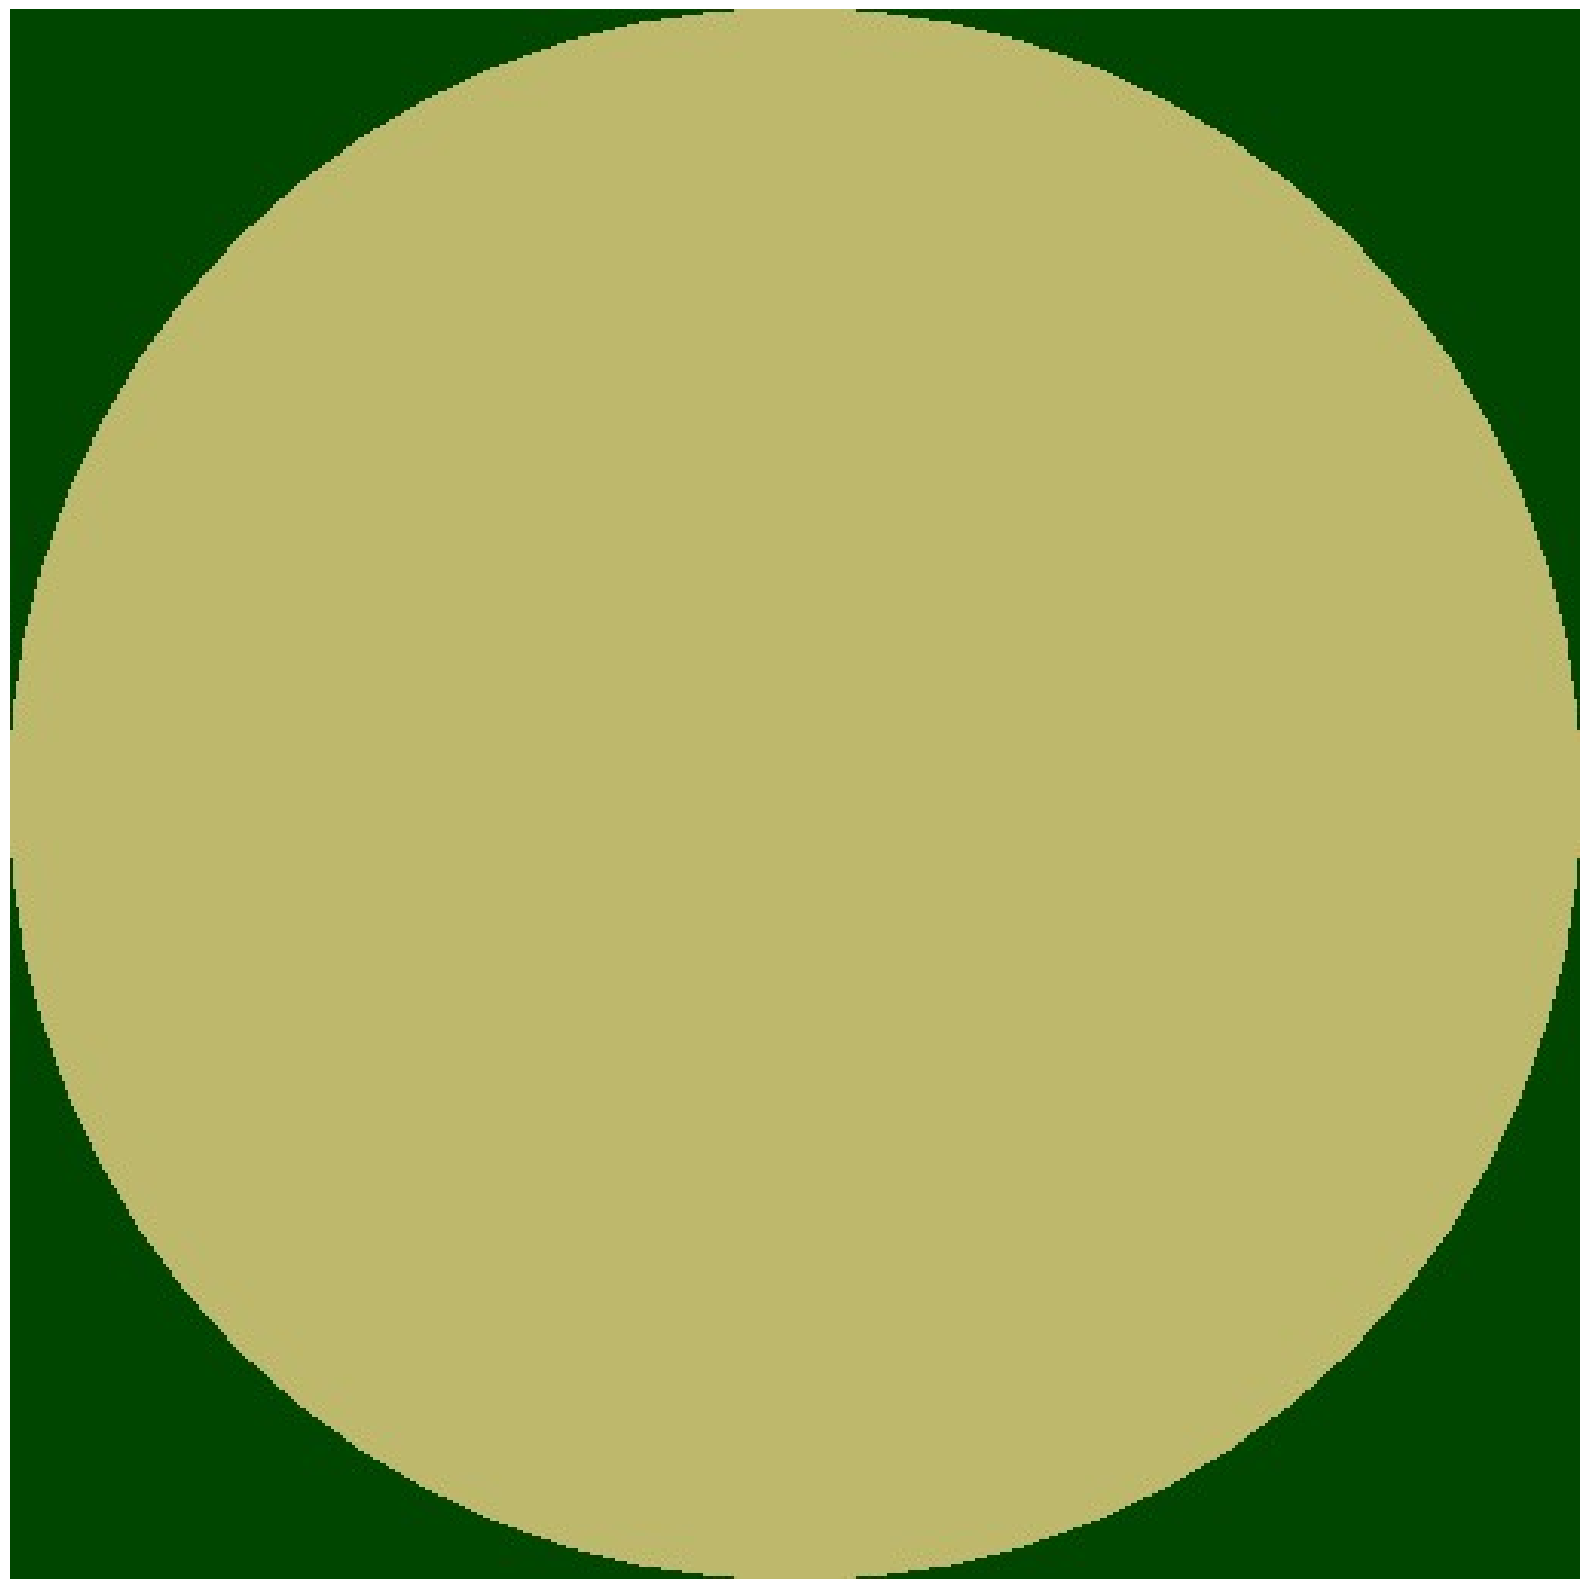

In [94]:
from PIL import Image
# read the image as numpy array
image_arr = np.array(Image.open(io.BytesIO(response.content)))

# plot the image for visualization
plt.figure(figsize=(16,16))
plt.axis('off')
plt.tight_layout()
plt.imshow(image_arr)

17,33
25/42
- one request, 40 day window
25/43
- one more, similar
26/44
- two more, similar
28/46
- 1 sq km
28/47 hmm.  PU did not go up.
- again, similar
29/48
- 2 km2
30/49
- 10 km2
36/57
- again, just changed the year
37/58
49/72  <- no query for a long time
- 3 cirles
64/89 < no query for a long time
- 1 circle
145/181
